# API exercise using Canvas

We talked briefly about using an Application Programming Interface (API) to interact with external systems from your own code. This notebook guides you through the steps of creating code to submit an assignment to Canvas using an API wrapper. <font color="green">Note: this has not been fully tested because I can't test certain student commands as an instructor. Let me know when you run into an issue.</font>

This requires a third-party library that is not available on lab computers. Documentation for the CanvasAPI package is available here: https://canvasapi.readthedocs.io/en/stable/examples.html

In [ ]:
!pip install canvasapi

Accessing most things on Canvas requires you to log in using your username and password. Saving that data into a script is really insecure. Fortunately, many web services have a system that creates an *access token* for you to use in your code. This token is *still something you should treat like a password*--if you gave it to someone else, they could access many parts of your account. But they can't change your password, and you can log in to the website in the normal way and delete the access token. So it's more secure than working with your username & password in a coding project.

Let's create an access token for our Canvas account. Graphics follow these steps (some parts are scribbled out). 

Log in to Canvas, then click Account (left sidebar), then Settings. ([Direct link](https://lms.au.af.edu/profile/settings) to Settings.)

From here, scroll down to **Approved Integrations** and click "+ New Access Token". 

In the *Purpose* field, type 'oper544 canvas api exercise' (or anything...this is a note to yourself). You can leave the *Expires* field blank (or change it to a date past today).

Click "Generate Token" and then copy the ENTIRE long string next to **Token**.

> If you close the popup and leave the page, you'll need to create a new token. Copy-paste the token into the variable `canvas_token` in the code cell below.

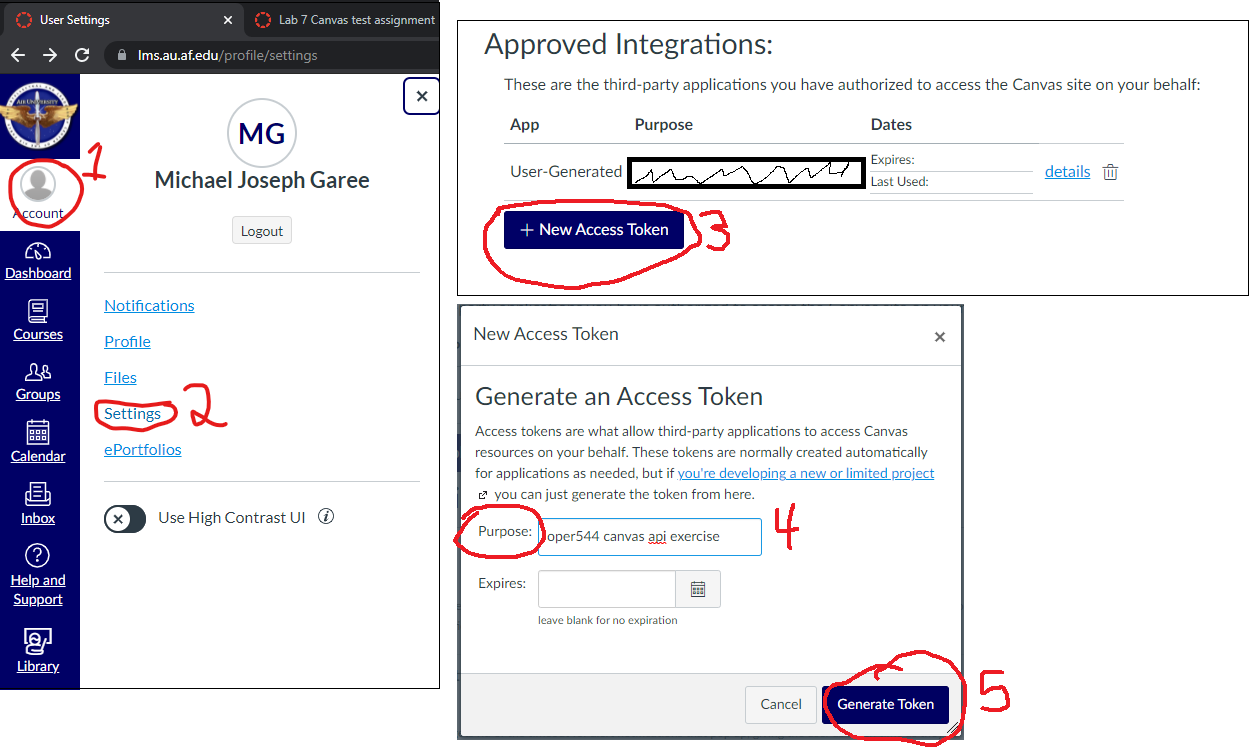

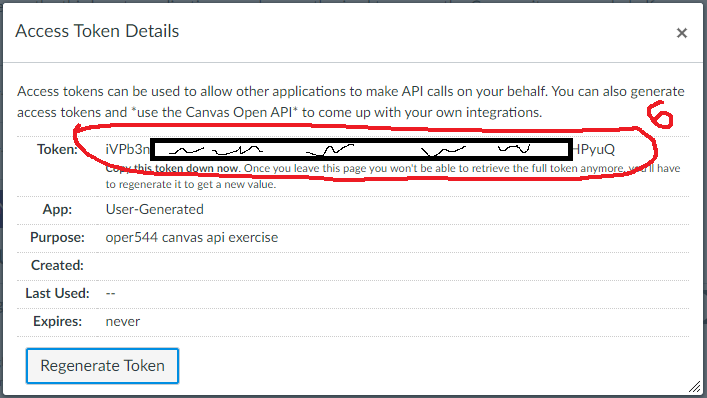

In [ ]:
canvas_token = 'iVPb3nLEgsrqNpvmcRWvhvLR9WVaor0j9gkIzoY2SH742ZF4TEwyYgxxyPQHPyuQ'  # paste your token here; remove any whitespace
# TODO remove my token
canvas_url = 'https://lms.au.af.edu/'  # the root of the URL of the site you want to work with (usually)

I've provided the URL for the Canvas API. It's usually just the root of the web site URL, but some APIs may have different URLs than their associated web sites. It depends.

Now we can "log in" to Canvas.

## Task

Read [this example](https://canvasapi.readthedocs.io/en/stable/examples.html#boilerplate) and adapt it to create an instance of `canvasapi.Canvas`, which we will name `canvas`.

In [ ]:
import canvasapi

canvas = canvasapi.Canvas(canvas_url, canvas_token)  # your code here

Inspect this object. (`print()`, `help()`, `dir()`, etc.)

In [ ]:
...

Our goal is to submit an assignment. Thinking in an object-oriented way, assignments are elements of a course, and courses are elements of Canvas as a whole. Courses and assignments have unique IDs that we can find in URLs.

I've created an assignment for this activity ([link](https://lms.au.af.edu/courses/24019/assignments/208389)). Go there, inspect the URL, and use your judgement to fill in the variables in the next cell.

In [ ]:
course_num = ''
assignment_num = ''

Now we can get information about the assignment:

In [ ]:
course = canvas.get_course(course_num)

assignment = course.get_assignment(assignment_num)

Inspect the `assignment`.

In [ ]:
...

There is some information about the assignment. Neat!

Now we'd like to get information about your submission. You've probably not made one yet.

*<font color="red">We are in untested territory now. Troubleshooting may be required (let me know). It is possible the Canvas API doesn't support certain things for students and your journey ends early.</font>*

Submissions are an element of assignments and are keyed by your numeric user ID. You probably don't know your numeric user ID. So let's find it.

In [ ]:
canvas.get_current_user().id

There it is. Maybe save that as a variable?

To get a submission for an assignment, you'll never guess the code for that:

In [ ]:
submission = assignment.get_submission(...your user id...)

Inspect your submission. 

Since you've (probably) not created one, it is possible that this will fail. If so, try going to the assignment in your web browser and submitting something; a Text Entry submission of 'hello' seems fastest. Then, re-run the previous code. Progress?

----------
You might be wondering why we don't create a new assignment using code. It's because the Canvas API *Python wrapper* we are using doesn't implement that feature (I think it was written for administrators & teachers). Now, the Canvas API itself does support that ([link](https://canvas.instructure.com/doc/api/submissions.html#method.submissions.create)), but creating the proper data structure to issue that command is outside the scope of this exercise.

So, I've asked you to make a submission the manual way and we'll try to continue with the API wrapper. Let me know if you'd like to learn about making API calls directly.

---------

If you have success (inspecting `submission` shows something interesting), then let's finish up by adding a text comment and attaching a file as a comment to the submission. Text comments use the API wrapper's `submission.edit()` function. File comments use the `submission.upload_comment()` function.

Based on this snippet from the [full Canvas API](https://canvas.instructure.com/doc/api/submissions.html#method.submissions_api.update):


| Parameter	| Type | Description |
| --------- | ---- | ----------- |
| comment[text_comment] | `string` | Add a textual comment to the submission. |

And the examples in the wrapper documentation, I think the approach is for `comment` to be a keyword argument for `edit()`, with its value equal to a dictionary of the form `{'text_comment': '...your comment string'}`.

So, the command will be:

In [ ]:
# note: completely untested; try the file upload below if this fails
# (it could fail silently...)

# saving to a variable so we can inspect the result
result = submission.edit(comment={'text_comment': 'hello world'})  

The wrapper command for file comments is more straightforward: just pass a filename. For this exercise, choose a simple existing file you have handy or create one real quick; something in the same directory as this exercise is easiest.

In [ ]:
result2 = submission.upload_comment('...insert your filename here...')

Inspect the results. If either one seemed somewhat successful, go to your submission on the Canvas web site and look for your effects. (Return to the assignment and click *Submission Details* on the right side.)

Please let me know how this went, success or otherwise.

-----------------

This exercise let you experience working with an API wrapper. It should have felt pretty natural after the experience you've had working with other modules and objects. If you glance at the official Canvas API documentation, you see some of the complexities that await you when you lack access to a wrapper: correctly building URLs, forming the right data structures, passing those data structures to the URL, parsing the response, and all the while managing your account access (if applicable). 

These actions are all quite managable and after working out your first couple commands, it becomes a lot of boilerplate, routine code. (Until you encounter something unexpected or undocumented, but that's part of the joy of programming!...)